In [4]:
import os
import pickle
import pandas as pd
from LogClass import LogObj
from ConnMySQLDB import MySQLDB
from Voice_Dectection_Utils import VoiceDetectionUtils
import warnings
warnings.filterwarnings('ignore')


In [5]:
# init
logFile = LogObj('.','logFile')
mySQLDB = MySQLDB(logFile)
utils = VoiceDetectionUtils(logFile)

In [6]:
#測試區間1 : (異常時間區段 2019-07-19 20:39:00~ 2019-07-19 20:56:00)
#ErrSQL = ["select * from t_device41 where rec_datetime >= '2019-07-19 20:39:00' and rec_datetime <= '2019-07-19 21:56:00';"];

#測試區間2 : (異常時間區段 2019-07-22 22:14:00~ 2019-07-22 22:23:00)
ErrSQL = ["select * from t_device41 where rec_datetime >= '2019-07-22 20:00:00' and rec_datetime <= '2019-07-22 22:24:00';"]

#測試區間3 : (異常時間區段 2019-07-23 15:19:00~ 2019-07-23 15:28:30, 2019-07-23 16:23:00~2019-07-23 17:02:00)
#ErrSQL = ["select * from t_device41 where rec_datetime >= '2019-07-23 15:00:00' and rec_datetime <= '2019-07-23 18:00:00';"];


#即時資料
'''
import datetime
now = datetime.datetime.now()
previous = (now- datetime.timedelta(minutes=1)).strftime("%Y-%m-%d %H:%M:%S")
ErrSQL = ["select * from t_device41 where rec_datetime >= '{}' and rec_datetime <= '{}';".format(previous, now)]

'''

OutputErrRaw = mySQLDB.extractData('192.168.11.115',3306,'Ac0u5Tasiai2','XY"S/?>wt5K"2','acoustics',ErrSQL)

In [7]:
result=pd.DataFrame()
result = utils.loadEnsembleModelPredict('./20190911model', '20190911',OutputErrRaw)
if len(result) >0:
    result["rec_datetime"] = pd.to_datetime(result["rec_datetime"]).dt.strftime('%Y%m%d%H%M%S')

C:\software_installed\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [27]:
tempResult = result.tail(7)
tempResult

,0,rec_datetime,file_name
19,0,20190722214336,1563803013.wav
20,0,20190722214845,1563803322.wav
21,0,20190722215356,1563803633.wav
22,0,20190722215905,1563803942.wav
23,0,20190722220413,1563804250.wav
24,1,20190722221443,1563804880.wav
25,1,20190722221958,1563805195.wav


In [6]:
#複製資料
src = "Y:/"
des = "C:/ACS/AI Team/code/error_voice"
utils.copyErrVoiceData(src, des, result)

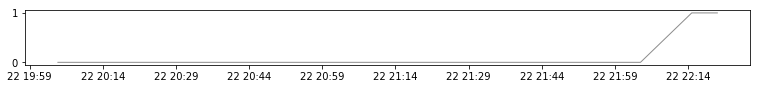

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(13, 1))
plt.plot(np.array(result.loc[:,"rec_datetime"]),np.array(result.loc[:,0]), marker='', color="grey", linewidth=1, alpha=0.9)
plt.show()

# For Demo

In [52]:
#prepare
tempResult=pd.DataFrame()
try:
    tempResult = result.tail(6)
except e:
    pass

import os
import time
import tkinter as tk
from PIL import ImageTk, Image
from winsound import *

def play(file):
    PlaySound(file, SND_FILENAME)

window = tk.Tk()
window.title('Voice Detection')

#放置圖片
#canvas = tk.Canvas(window,width=80, height=80)
image = Image.open('blackbg.jpg')
image = image.resize((300, 200))
image_file = ImageTk.PhotoImage(image)
l1=tk.Label(window,image=image_file)
l1.pack()
#image = canvas.create_image(250, 100, anchor='n',image=image_file) 
#canvas.pack()

#放置label
l = tk.Label(window, text='', font=('Arial', 12), width=30, height=2)
l.pack()

#放置Button
def startDemo():
    picPath="./forDemo/example_pics"
    voicePath="./forDemo/example_voice"
    if os.path.isdir(picPath) and os.path.isdir(voicePath):
        if len(tempResult)>0:
            start=0
            
            for index,row in tempResult.iterrows():
                start+=1
                if row[0]==1:
                    l.config(text="異常狀態發生", fg="red")
                else:
                    l.config(text="無異常狀態")
                imagePath=picPath+"/camera01-"+str(start)+".jpg"
                image = Image.open(imagePath)
                image = image.resize((300, 200))
                image_file = ImageTk.PhotoImage(image)
                l1.configure(image=image_file)
                l1.image = image_file
                window.update()
                print(voicePath+"/"+str(start)+".wav")
                play(voicePath+"/"+str(start)+".wav")
                l1.after(1000)
                print(start)
                
        """
        for i in range(1,7):
            if i >= 5:
                l.config(text="異常狀態發生", fg="red")
            else:
                l.config(text="無異常狀態")
            imagePath=picPath+"/camera01-"+str(i)+".jpg"
            image = Image.open(imagePath)
            image = image.resize((300, 200))
            image_file = ImageTk.PhotoImage(image)
            l1.configure(image=image_file)
            l1.image = image_file
            window.update()
            print(voicePath+"/"+str(i)+".wav")
            play(voicePath+"/"+str(i)+".wav")
            l1.after(1000)
            print(i)
        """
b = tk.Button(window, text='Start Demo', font=('Arial', 12), width=10, height=1, command=startDemo)
b.pack()

window.mainloop()

#Window.destroy()
